In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn import datasets
from matplotlib.image import imread
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
%matplotlib inline

# Machine Learning with Python

## Supervised Learning with Logistic Regression

### Example 1 Iris Dataset

The famous dataset contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. We will try to build a classifier to detect the Iris-Virginica type.

<figure>
    <img src='Iris.png' width="600" />
    <figcaption>Flowers of three iris plant species</figcaption>
</figure>

**First we consider a simple case: one feature and two classes. The feature is petal width and the two classes are Virginica and non-virginica.**

In [2]:
# Load the data
iris = datasets.load_iris()
# The data is a dictionary
# Show the keys
print(list(iris.keys()))
# Use the last column of the data as the feature, which is the petal width
X = iris["data"][:, 3:] # petal width
# 1 if Iris-Virginica, else 0
y = (iris["target"] == 2).astype(int) 

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


In [3]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
# print out the coefficients:
log_reg.intercept_, log_reg.coef_

(array([-7.1947083]), array([[4.3330846]]))

(100, 2)
[0 1]


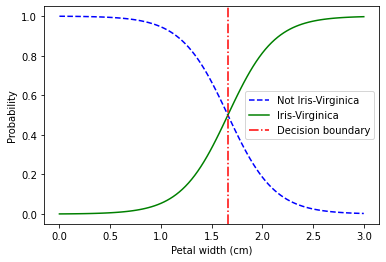

In [4]:
# create new petal width for predictions. 
# The new values are 100 numbers equidistantly distributed between 0 and 3
x_new = np.linspace(0, 3, 100)
X_new = np.c_[x_new]
# compute the predicted probability for the new data p=sigma(x^Tbeta)
y_proba = log_reg.predict_proba(X_new)
# There are two columns in y_proba
print(y_proba.shape)
# See which column represent which. So the first column represents label 0
# and second column represents label1
print(log_reg.classes_)
# make a plot of the probability for the label to be 0:
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# make a plot of the probability for the label to be 1:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability');

# Draw the decision boundary: x=1.66
plt.axvline(x=1.66, ls='-.', c='r', label='Decision boundary');
plt.legend();

In this particular example, the linear equation is
\begin{equation}
h(\boldsymbol{x}) = \boldsymbol{x}^T\boldsymbol{\beta} = \beta_0 + \beta_1x_1
\end{equation}
Equating $h(\boldsymbol{x})$ to $0$ gives:
\begin{equation}
x_1 = -\frac{\beta_0}{\beta_1} = 7.1947083/4.3330846 \approx 1.66
\end{equation}

Therefore, the decision boundary is at around 1.66 cm where both probabilities are equal to $50\%$: if the petal width is higher than 1.66 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):

In [5]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

**Now we consider two features, petal width and length and two classes.**

In [6]:
iris = datasets.load_iris()
X = iris["data"][:, 2:] # petal length and width
y = (iris["target"] == 2).astype(int) 

log_reg = LogisticRegression()
log_reg.fit(X, y)
# print out the coefficients:
log_reg.intercept_, log_reg.coef_

(array([-17.5481106]), array([[2.77762524, 2.38552012]]))

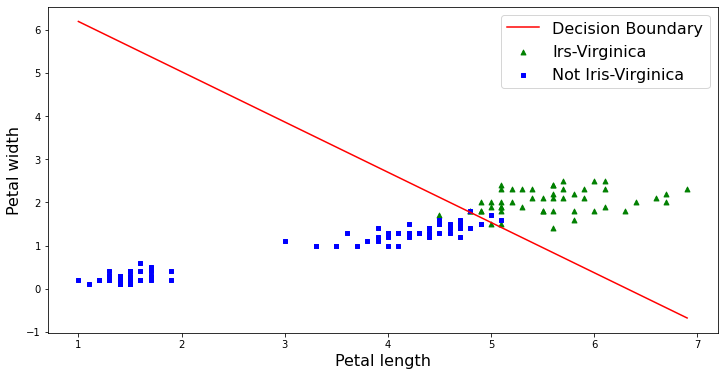

In [7]:
rcParams["figure.figsize"] = 12,6
# Make a plot of the decison boundary
x_db = [X[:,0].min(), X[:,0].max()]
beta0 = log_reg.intercept_[0]
beta1 = log_reg.coef_[0][0]
beta2 = log_reg.coef_[0][1]
y_db = - (beta0 + np.dot(beta1, x_db)) / beta2

plt.scatter(X[iris["target"] == 2, 0], X[iris["target"] == 2, 1], 
            marker='^', c='g', s=24, label='Irs-Virginica')
plt.scatter(X[iris["target"] != 2, 0], X[iris["target"] != 2, 1], 
            marker='s', c='b', s=24, label='Not Iris-Virginica')
plt.plot(x_db, y_db, label='Decision Boundary', c='r')
plt.legend(fontsize=16)
plt.xlabel('Petal length', fontsize=16)
plt.ylabel('Petal width', fontsize=16);

## Supervised Learning with Support Vector Machine

### Example 2 A Synthetic Example for Regression

We now use support vector machine to approximate data generated by the quadratic function
$$ y = 0.5x^2 +x + 2 $$
with standard Gaussian noises added.

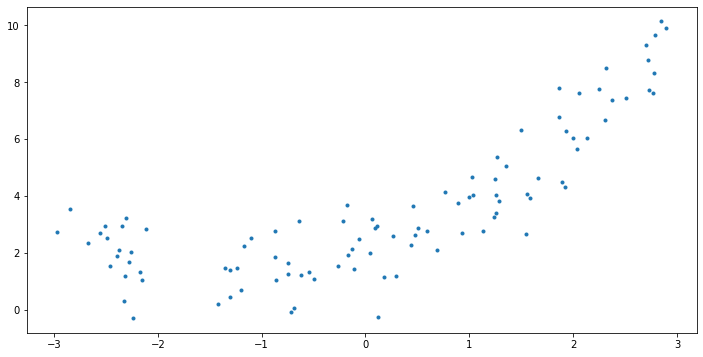

In [8]:
# one hundred cases
n = 100
# generate 100 uniform numbers between -3 and 3
x = 6*np.random.rand(n)-3
# generate a quadratic function with some Gaussian noises
y = 0.5*x**2 + x + 2 + np.random.randn(n)
# plot the data
plt.plot(x, y, '.');

In [9]:
from sklearn.svm import SVR

kernel_svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_reg", SVR(kernel="poly", degree=2, coef0=1))
])

kernel_svm_reg.fit(np.c_[x], y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', SVR(coef0=1, degree=2, kernel='poly'))])

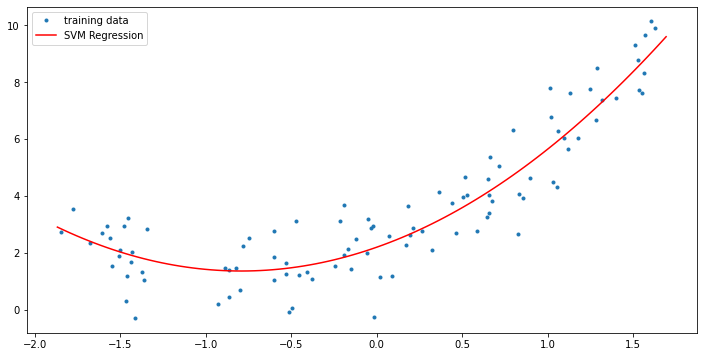

In [10]:
# plot the scaled data and the quadratic function
X_scaled = kernel_svm_reg["scaler"].transform(np.c_[x])
plt.plot(X_scaled, y, '.', label='training data');
x_new = np.linspace(-3, 3, 100)
X_new = kernel_svm_reg["scaler"].transform(np.c_[x_new])
plt.plot(X_new, kernel_svm_reg.predict(np.c_[x_new]), color='r', label='SVM Regression');
plt.legend();

## Unsupervised Learning with K-Means Clustering

### Example 3: Image Segmentation using K-Means Clustering

Image segmentation is the task of partitioning an image into multiple segments. In
semantic segmentation, all pixels that are part of the same object type get assigned to
the same segment. For example, in a self-driving car’s vision system, all pixels that are
part of a pedestrian’s image might be assigned to the “pedestrian” segment (there
would just be one segment containing all the pedestrians). Here, we are going to do something much simpler: color segmentation. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient,
for example if you want to analyze satellite images to measure how much total forest
area there is in a region, color segmentation may be just fine.

In [11]:
image = imread('island.png')
image.shape

(570, 763, 4)

The image is represented as a 3D array: the first dimension’s size is the height, the
second is the width, and the third is the number of color channels, in this case red,
green, blue and alpha (that handles transpanrancy) (RGBA). In other words, for each pixel there is a 3D vector containing the intensities of red, green, blue and alpha, each between 0.0 and 1.0. 

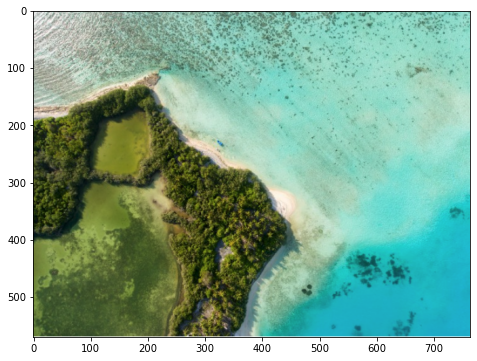

In [12]:
plt.imshow(image);

The following code reshapes the array to get a long list of RGBA colors, then it clusters these colors using K-Means. Finally it reshapes this long list of colors to get the same shape as the original image. We consider three cases: K=3, K=6 and K=15.

In [13]:
X = image.reshape(-1, 4)
kmeans = KMeans(n_clusters=3).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [14]:
kmeans.cluster_centers_

array([[0.1985652 , 0.66970676, 0.67837167, 1.        ],
       [0.29947495, 0.34574986, 0.15790406, 1.        ],
       [0.60719293, 0.8107796 , 0.7298341 , 1.        ]], dtype=float32)

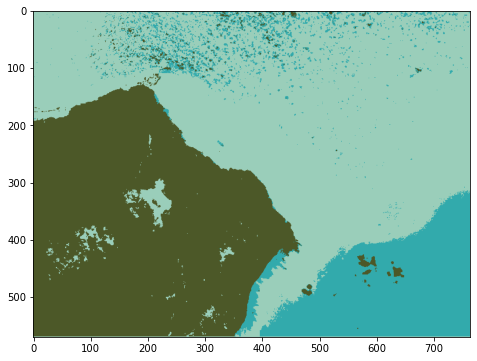

In [15]:
plt.imshow(segmented_img);

In [16]:
X = image.reshape(-1, 4)
kmeans = KMeans(n_clusters=6).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

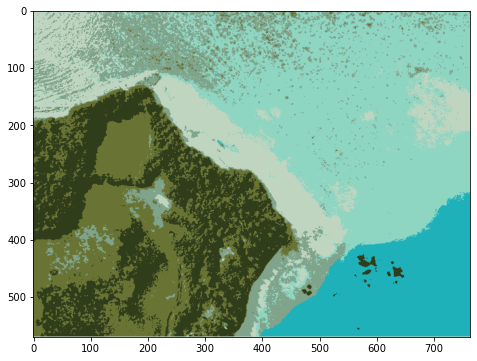

In [17]:
plt.imshow(segmented_img);

In [18]:
X = image.reshape(-1, 4)
kmeans = KMeans(n_clusters=15).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

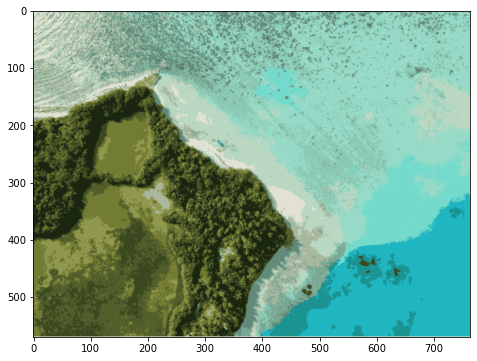

In [19]:
plt.imshow(segmented_img);

##  Model Selection by Grid Search

Choosing correct hyperparameters for a model is crucial for the performance of the model. One way to do that would be to tune the hyperparameters manually, until we find a great combination of hyperparameter values. This would be very tedious work, and we may not have time to explore many combinations. Instead we should get Scikit-Learn’s *GridSearchCV* to search for us. All we need to do is tell it which hyperparameters we want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation. For example, the following code searches for the best combinationof hyperparameter value $C$ for the linear SVR.

### Example 4: Diabetes Data
Consider the diabetes data in sklearn.datasets, where ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $N = 442$ diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. Use grid search to find the best hyperparameter value C for the lienar SVR.

In [20]:
# Load the data
X, y = datasets.load_diabetes(return_X_y=True)

svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR(random_state=10, max_iter=10000)),
])

# We only have one parameter to tune, which is C, use a dictionary to specify
# the range of the parameters we would like to consider
param_grid = {'linear_svr__C': np.linspace(0.0001, 100, 200)}
grid_search = GridSearchCV(svm_reg, param_grid, cv=10, 
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_svr',
                                        LinearSVR(max_iter=10000,
                                                  random_state=10))]),
             param_grid={'linear_svr__C': array([1.00000000e-04, 5.02612060e-01, 1.00512412e+00, 1.50763618e+00,
       2.01014824e+00, 2.51266030e+00, 3.01517236e+00, 3.51768442e+00,
       4.02019648e+00, 4.52270854e+00, 5.02522060e+00, 5.52773266e+00,
       6.0...
       8.84422226e+01, 8.89447347e+01, 8.94472467e+01, 8.99497588e+01,
       9.04522709e+01, 9.09547829e+01, 9.14572950e+01, 9.19598070e+01,
       9.24623191e+01, 9.29648312e+01, 9.34673432e+01, 9.39698553e+01,
       9.44723673e+01, 9.49748794e+01, 9.54773915e+01, 9.59799035e+01,
       9.64824156e+01, 9.69849276e+01, 9.74874397e+01, 9.79899518e+01,
       9.84924638e+01, 9.89949759e+01, 9.94974879e+01, 1.00000000e+02])},
             scoring='

Note that here we used 'linear_svc__C' to indicate that we want to search for the best value for C in the linearSVR model. To see a list of parameters you can use grid search for, use:

In [21]:
svm_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'linear_svr', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'linear_svr__C', 'linear_svr__dual', 'linear_svr__epsilon', 'linear_svr__fit_intercept', 'linear_svr__intercept_scaling', 'linear_svr__loss', 'linear_svr__max_iter', 'linear_svr__random_state', 'linear_svr__tol', 'linear_svr__verbose'])

Now we show the best parameters searched:

In [22]:
grid_search.best_params_

{'linear_svr__C': 18.09053417085427}

or the best estimator directly:

In [23]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svr',
                 LinearSVR(C=18.09053417085427, max_iter=10000,
                           random_state=10))])

To see the best test score, we can use:

In [24]:
grid_search.cv_results_['mean_test_score'].max()

-54.885082865348046

We can also search for the best C and epsilon at the same time:

In [25]:
# Load the data
X, y = datasets.load_diabetes(return_X_y=True)

svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR(random_state=10, max_iter=10000)),
])

# We only have one parameter to tune, which is C, use a dictionary to specify
# the range of the parameters we would like to consider
param_grid = {'linear_svr__C': np.linspace(0.0001, 20, 20), 
              'linear_svr__epsilon': np.linspace(0, 50, 50)}
grid_search = GridSearchCV(svm_reg, param_grid, cv=10, 
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_svr',
                                        LinearSVR(max_iter=10000,
                                                  random_state=10))]),
             param_grid={'linear_svr__C': array([1.00000000e-04, 1.05272632e+00, 2.10535263e+00, 3.15797895e+00,
       4.21060526e+00, 5.26323158e+00, 6.31585789e+00, 7.36848421e+00,
       8.42111053e+00, 9.47373684e+00, 1.05263632e+01, 1.15789895e+01,
       1.2...
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])},
             sco

In [26]:
grid_search.best_params_

{'linear_svr__C': 20.0, 'linear_svr__epsilon': 18.367346938775512}

which is the best combination of C and epsilon.

In [27]:
grid_search.cv_results_['mean_test_score'].max()

-54.52700082460192

To see what you can get from the cv_results_ property, use:

In [28]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_linear_svr__C', 'param_linear_svr__epsilon', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

## Neural Networks: Multi-Layer Perceptron (MLP)

### Example 5: MLP for the Iris Dataset

In [29]:
# load data
iris = load_iris()
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=100)
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with two hidden layers of size 10 and 5
# For small data, it is recommended to use the lbfgs solver
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), solver = 'lbfgs', 
                    max_iter=5000, random_state=10)
# fit the model
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=5000, random_state=10,
              solver='lbfgs')

In [30]:
# Make predictions
y_pred = mlp.predict(X_test_scaled)
# Check accuracy score
print(accuracy_score(y_pred, y_test))

0.9666666666666667


In [31]:
# See the weight matrix
mlp.coefs_

[array([[-0.26284822, -1.5909868 ,  0.03991887,  0.83256749,  1.89846949,
          0.09144926, -0.5057814 ,  0.55908157, -0.36417775, -0.64952275],
        [-1.15863005,  1.95645907, -1.18517089, -1.13850359,  0.76444104,
          0.51870371,  0.17274489, -0.04390784,  0.48350948,  0.40476174],
        [ 1.52549282, -2.40874742,  2.27457427, -0.18438249,  1.04358587,
          0.10919021,  0.06114427, -0.17364451,  0.28469868,  0.00322082],
        [ 1.40983839, -1.88806048,  2.19286325, -0.36216103,  0.56916282,
         -0.0741385 , -0.58278172,  0.21114843, -0.50925411,  0.04278787]]),
 array([[-0.48990359, -0.65018247,  0.14782556, -0.50448203, -1.43860269],
        [ 3.06136135,  1.95203904, -0.05524737,  1.12301348,  0.3964577 ],
        [-0.41246868,  0.08714353, -0.16568908, -0.12646271, -1.55450115],
        [ 0.34022385, -0.54687507, -0.27893901, -0.10758799,  1.22667773],
        [ 0.22713968,  0.20750659, -0.28092565,  0.14423403, -1.97139022],
        [ 0.30301573,  0.61

Since the number of features is 4, the number of ouptuts is 3, and we created two hidden layers of size 10 and 5, the weight matrices has size (4, 10), (10, 5) and (5,3)

In [32]:
# Bias:
mlp.intercepts_

[array([-0.72354384,  0.62986198, -0.99888196,  2.30434515, -1.03471944,
        -0.54781192, -0.20169513,  1.20607824, -0.29447755, -0.33977377]),
 array([ 1.42878147,  0.19266391, -0.63987564, -0.04467568,  4.82768151]),
 array([-3.65056533, -2.75528663,  5.67517785])]

## Convolutional Neural Networks with Keras

### Example 6: Convolutional Neural Network for the MNIST Data

The MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

First obtain the data using Scikit-Learn using sklearn.datasets.fetch_openml().

In [33]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [34]:
# minist is a dictionary. See its keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [35]:
# Feature matrix:
X = mnist['data']
# Target vector:
y = mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to
do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using
Matplotlib’s imshow() function:

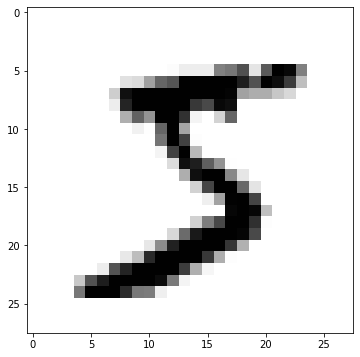

In [36]:
# Take the first instance of the data (first row of X):
digit = X[0, :]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap = mpl.cm.binary);

Now we apply convolutional neural network to MNIST.

In [37]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Add a dimension at the end to make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# one-hot-encode the target variable
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [38]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [39]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 27s 62ms/step - loss: 0.3644 - accuracy: 0.8895 - val_loss: 0.0867 - val_accuracy: 0.9758
Epoch 2/15
422/422 [==============================] - 28s 67ms/step - loss: 0.1119 - accuracy: 0.9656 - val_loss: 0.0583 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0864 - accuracy: 0.9728 - val_loss: 0.0468 - val_accuracy: 0.9880
Epoch 4/15
422/422 [==============================] - 27s 65ms/step - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 25s 60ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 28s 65ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0343 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 28s 67ms/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0330 - val_accuracy:

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023873303085565567
Test accuracy: 0.991599977016449


The test accuracy is as high as $99.15\%$!